## Improving a model

First predictions = baseline predictions
First model = baseline model.

From a data prespective:
* could we collect more data? (generally the more data the better)
* could we improve our data?

From model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters = model find these patterns in data

Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns...

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [4]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

### Tuning hyperparameters by hand

Lets's make 3 sets: training, validation and test.

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_fatures`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_pred):
    """
    Preforms evaluation comparison on y_true labels vs y_pred labels on our classification model.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {"accuracy" : round(accuracy, 2), "precision" : round(precision, 2), "recall" : round(recall, 2), "f1" : round(f1, 1)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Prec: {precision * 100:.2f}%")
    print(f"Rec: {recall:.2f}%")
    print(f"f1: {f1:.2f}%")

    return metric_dict

In [8]:
from sklearn.model_selection import train_test_split
heart_disease = pd.read_csv("heart-disease.csv")
np.random.seed(42)

# SUFFLE THE DATA
heart_disease_shuffeled = heart_disease.sample(frac=1)

X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

# SPLIT THE DATA INTO TRAIN, VALIDATION AND TEST SETS
train_split = round(0.7 * len(heart_disease_shuffeled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffeled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 82.22%
Prec: 81.48%
Rec: 0.88%
f1: 0.85%


In [9]:
clf.get_params() #default hyperparams

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
np.random.seed(42)

# Create second classifier with different hyperparams
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train, y_train)

# Make baseline predictions
y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 80.00%
Prec: 80.77%
Rec: 0.84%
f1: 0.82%


In [11]:
np.random.seed(42)

# Create second classifier with different hyperparams
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10) #look at recomended settings in documentation of sklearn
clf_3.fit(X_train, y_train)

# Make baseline predictions
y_preds_3 = clf_3.predict(X_valid)
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 80.00%
Prec: 80.77%
Rec: 0.84%
f1: 0.82%


### Hyperparameter tuning with RandomizedSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": [None, "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]};

np.random.seed(42)
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

#Setup randomized search cv
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=50, #number of models to try
                            cv=5,
                            verbose=2)

#FIt the randomized search cv version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=10

In [19]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5}

In [21]:
# Lets make predictions with the best hyperparams
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds) #not neccecarily always better than manual tunning

Acc: 85.25%
Prec: 78.79%
Rec: 0.93%
f1: 0.85%


### Hyperparam tunning with GridSearchCV

In [22]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': [None, 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [31]:
from sklearn.model_selection import GridSearchCV ##SIMILAR TO RANDOMIZED but it will go through all combinations of params

grid_2 = {'n_estimators': [100, 200, 300],
          'max_depth': [None, 3],
          'max_features': ['sqrt'],
          'min_samples_split': [2, 4],
          'min_samples_leaf': [2, 4]}

In [32]:
np.random.seed(42)
X = heart_disease_shuffeled.drop("target", axis=1)
y = heart_disease_shuffeled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

#Setup Grid search cv
gs_clf = GridSearchCV(estimator=clf, 
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

#FIt the grid search cv version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2,

In [33]:
gs_clf.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [34]:
# Lets make predictions with the best hyperparams
gs_y_preds = gs_clf.predict(X_test)

# Evaluate predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds) #not neccecarily always better than manual tunning

Acc: 81.97%
Prec: 75.76%
Rec: 0.89%
f1: 0.82%


<Axes: >

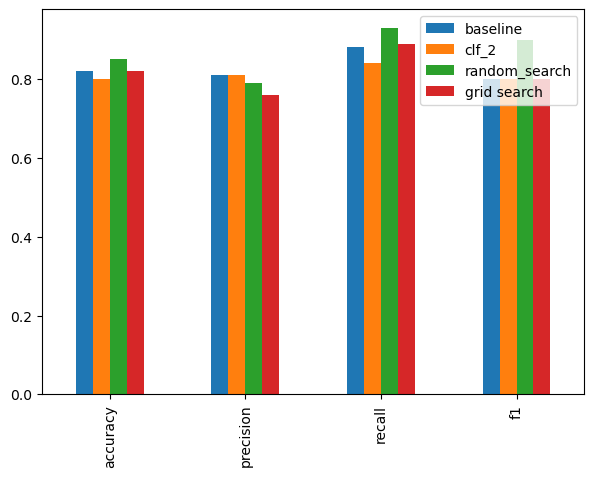

In [38]:
# Lets compare our different model metrics
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(7, 5))

**All models we want to compare metrics between need to have the same data**

#### Correlation analysis

example: Size of the land and size of the house (we mby find out that all the listings with larger land have larger size of the house)

In example case we can remove this from analysis cause it might not affect our model

**Forward/backward attribute selection**

Train the model with attributes and start taking away attributes and see if results improve or reverse this idea to start with less attr and than start adding them